In [1]:
# Import all Libraries
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime



3
[(datetime.datetime(2019, 11, 15, 19, 31), 214), (datetime.datetime(2019, 11, 17, 7, 37), 246), (datetime.datetime(2019, 11, 17, 7, 40), 313), (datetime.datetime(2019, 11, 17, 11, 21), 195), (datetime.datetime(2019, 11, 17, 11, 25), 313), (datetime.datetime(2019, 11, 17, 12, 40, 25), 332), (datetime.datetime(2019, 11, 17, 13, 41), 256), (datetime.datetime(2019, 11, 17, 13, 56), 38), (datetime.datetime(2019, 11, 17, 15, 7), 271), (datetime.datetime(2019, 11, 17, 17, 27), 275), (datetime.datetime(2019, 11, 17, 19, 9), 135), (datetime.datetime(2019, 11, 18, 3, 22), 384), (datetime.datetime(2019, 11, 18, 4, 0), 193), (datetime.datetime(2019, 11, 18, 7, 58), 121), (datetime.datetime(2019, 11, 18, 10, 36), 184), (datetime.datetime(2019, 11, 18, 11, 37), 338), (datetime.datetime(2019, 11, 19, 4, 1), 200), (datetime.datetime(2019, 11, 19, 17, 32), 106), (datetime.datetime(2019, 11, 20, 3, 24), 267), (datetime.datetime(2019, 11, 24, 3, 15), 267)]
[214, 246, 313, 195, 313, 332, 256, 38, 271, 2

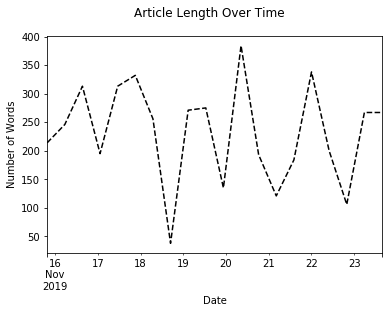

"\n\n            if min_date is 0:\n                min_date = row.date\n            if row.date < min_date:\n                min_date = row.date\n        content_len.append(row.content_len)         \n\n        #print(row.date)\n    #print(content_len)\n    #print(min_date)\n   # ts = pd.Series(content_len, index=pd.date_range(start=min_date, periods=count, freq='12H')).cumsum()\n"

In [2]:
# Plot content length over time
url_data = pd.read_csv("../dataset/meta_v1_edited.csv")

time_len = list()
diff_len = list()
min_date = 0
max_date = 0
orig_len = 0
sum = 0
count = 0
avg_count = 0
title_len = list()

content_len = list()
content_len_date = list()
count = 0
date_list = list()
content_len_list = list()

# Loop over all groups
for group_num in range(3,4):
    #group 3-> meth 
    # Loop over all content_len within one group
    print(group_num)
    date_list.clear()
    content_len_list.clear()
    content_len_date.clear()
    count = 0
    for row in url_data.itertuples():
        count += 1
        if(row.group_edited is group_num):
            edited_date = row.date[:row.date.index('+')]
            dt_object = datetime.strptime(edited_date, "%Y-%m-%d %H:%M:%S")
            content_len_date.append((dt_object, row.content_len))
            #content_len_date.append((dt_object, row.content_len))
    result = sorted(content_len_date, key=lambda x: x[0])
    if len(result) < 3:
        continue
    print(result)
    for i in result:
        date_list.append(i[0])
        content_len_list.append(i[1])
    first_time = date_list[0]
    last_time = date_list[(len(date_list)-1)]
    duration = last_time - first_time
    duration_in_s = duration.total_seconds()  
    hours = divmod(duration_in_s, 3600)[0]
    freq_in_hours = str(round((hours / len(date_list)), 1)) + 'H'
    ts = pd.Series(content_len_list, index=pd.date_range(start=first_time, periods=len(date_list), freq=freq_in_hours))
    print(content_len_list)
    fx = ts.plot(style='k--')#, label='Number of Words')
    plt.suptitle("Article Length Over Time")
    fx.set_xlabel("Date")
    fx.set_ylabel("Number of Words")
    #ts.rolling(window=2).mean().plot(style='b', label='Rolling Mean')  
    #plt.legend()

    plt.show()
    #print(content_len_date)
    #print(date_list)
    #print(content_len_list)
    #print(result)
    #print(content_len_date)
       
'''

            if min_date is 0:
                min_date = row.date
            if row.date < min_date:
                min_date = row.date
        content_len.append(row.content_len)         

        #print(row.date)
    #print(content_len)
    #print(min_date)
   # ts = pd.Series(content_len, index=pd.date_range(start=min_date, periods=count, freq='12H')).cumsum()
'''
        
        
  


In [3]:
      
        if min_date is 0:
            min_date = row.date
            orig_len = row.content_len
        if row.date < min_date:
            min_date = row.date
            orig_len = row.content_len
        #print(row.date)
        #print(row.content_len)
        #print(row.title_len)
        time_len.append((row.title_len))
        #time_len[row.date] = row.title_len
        #print(row.group)
print(min_date)
for row in url_data.itertuples():
    if(row.group is 2):
        if(row.date != min_date):
            diff_len.append(row.content_len - orig_len)
            title_len.append(row.content_len)
print(orig_len)
print(diff_len)

for i in title_len:
    print(i)
    sum += i
    count += 1
avg_len = sum / count
print("avg count: ", avg_len)
print("orig len: ", orig_len)

#for i in diff_len:
 #   sum += i
 #   count += 1
#avg_diff = sum/count
#print("avg diff: ", avg_diff)


#ts = pd.Series(time_len, index=pd.date_range(start='2019-10-18', periods=5, freq='14.4H')).cumsum()
#ts.plot(style='k--')
#ts.rolling(window=1).mean().plot(style='b')
#ts.rolling(window=1).std().plot(style='k')
#pd.rolling_mean(ts, 1).plot(style='k')

#plt.show()


IndentationError: expected an indented block (<ipython-input-3-918c5746320c>, line 16)